# ONLINE FOOD ORDER PREDICTION USING MACHINE LEARNING

In [2]:
import pandas as pd

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### IMPORTING DATA

In [3]:
data = pd.read_csv('artifacts\\data_ingestion\\Raw_data.csv')

In [4]:
data.head()

,Age,Gender,Marital_status,occupation,monthly_income,educational_qualifications,family_size,latitude,longitude,pincode,output,feedback,unknow_column
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes\r
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes\r
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes\r
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes\r
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes\r


In [5]:
data.family_size.unique()

array([4, 3, 6, 2, 5, 1], dtype=int64)

In [6]:
data.Marital_status.unique()

array(['Single', 'Married', 'Prefer not to say'], dtype=object)

### DATA EXPLORATION

In [4]:
data.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [6]:
data.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
Unnamed: 12                    object
dtype: object

In [7]:
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [8]:
data.duplicated().sum()

103

### DATA ANALYSIS

In [9]:
data.rename(columns = {'Unnamed: 12' : 'Target'}, inplace = True)

#### Online Food Order Decisions Based on the Age of the Customer

<Axes: title={'center': 'Online Food Order Decisions Based on the Age of the Customer'}, xlabel='Age', ylabel='Count'>

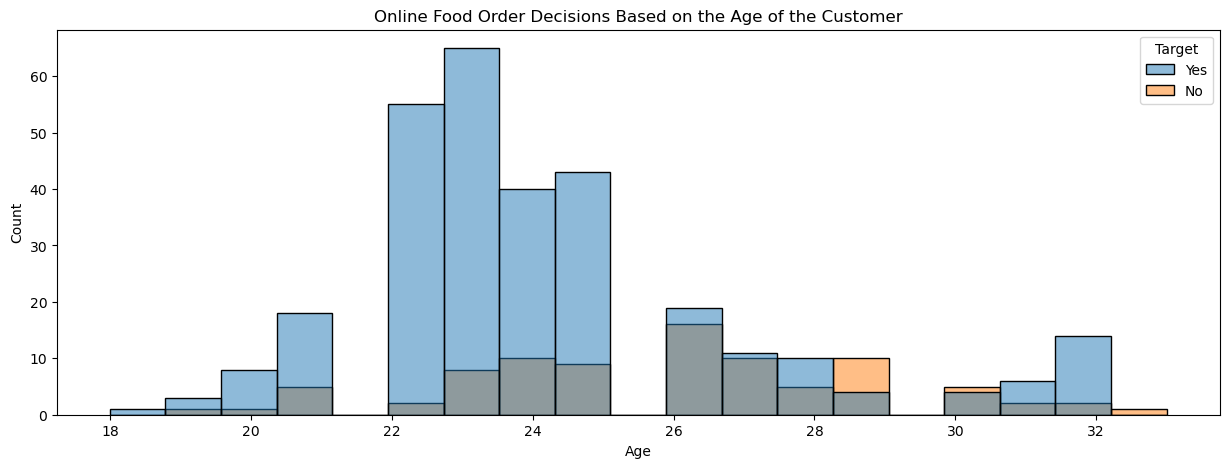

In [10]:
plt.figure(figsize = (15, 5))
plt.title('Online Food Order Decisions Based on the Age of the Customer')
sns.histplot(x = 'Age',  hue = 'Target', data = data)

#### > From the above graph We can notice that the age group of 22-25 ordered the food often again

#### Online Food Order Decisions Based on the Size of the Family

<Axes: title={'center': 'Online Food Order Decisions Based on the Size of the Family'}, xlabel='Family size', ylabel='Count'>

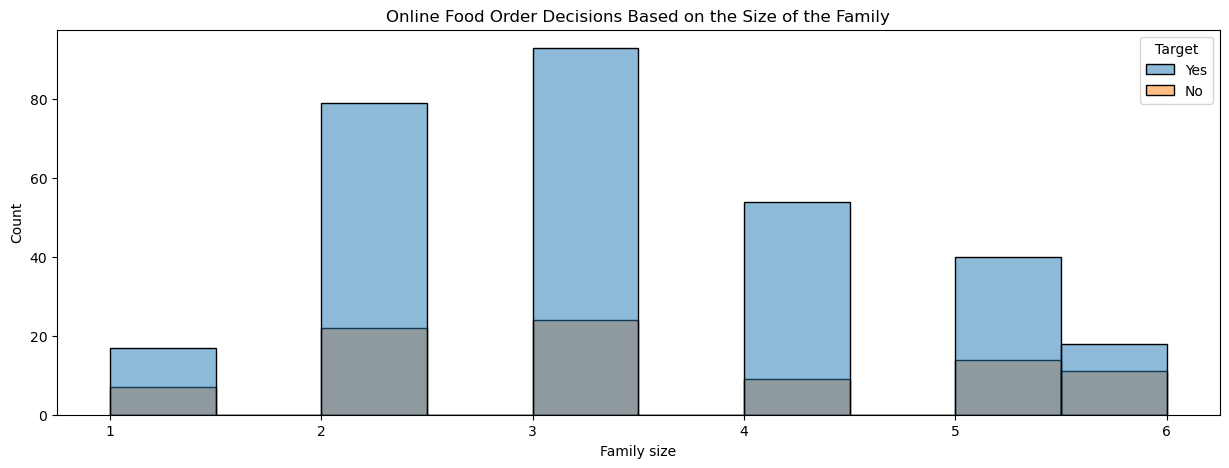

In [11]:
plt.figure(figsize = (15, 5))
plt.title('Online Food Order Decisions Based on the Size of the Family')
sns.histplot(x = 'Family size',  hue = 'Target', data = data)

#### > From the above graph We can notice that Families with 2 and 3 members are ordering food often

### Creating a dataset of all the customers who ordered the food

In [12]:
ordered_customers = data.query("Target == 'Yes'")

In [13]:
ordered_customers.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Target
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


#### Online Food Order Decisions Based on the Gender

In [14]:
gender = ordered_customers['Gender'].value_counts()

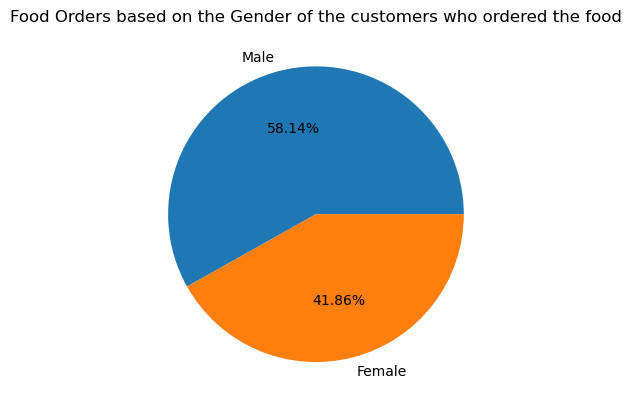

In [15]:
plt.title('Food Orders based on the Gender of the customers who ordered the food')
plt.pie(gender, labels = ['Male', 'Female'], autopct = '%.2f%%')
plt.show()

#### According to the dataset, male customers are ordering more compared to females

#### Online Food Order Decisions Based on the Martial Status of customers who ordered the food.

In [16]:
marital_status = ordered_customers['Marital Status'].value_counts()

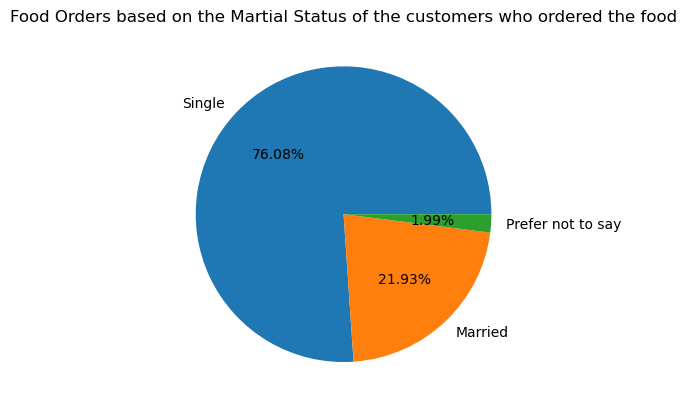

In [17]:
plt.title('Food Orders based on the Martial Status of the customers who ordered the food')
plt.pie(marital_status, labels = ['Single', 'Married', 'Prefer not to say'], autopct = '%.2f%%')
plt.show()

#### According to the dataset, Single relation customers are ordering more compared to Married and others

#### Online Food Order Decisions Based on the Income of the customers who ordered the food.

In [18]:
income = ordered_customers['Monthly Income'].value_counts()

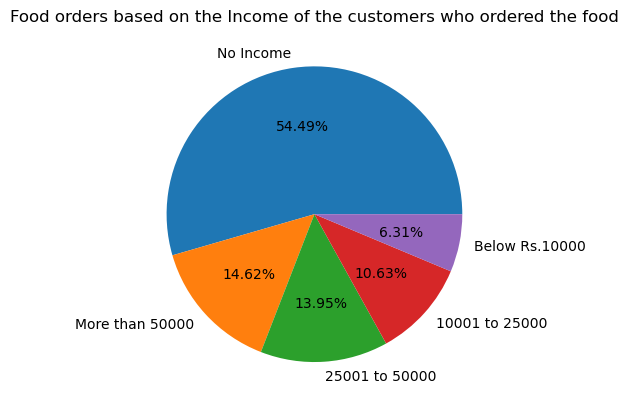

In [19]:
plt.title('Food orders based on the Income of the customers who ordered the food')
plt.pie(income, labels = ['No Income', 'More than 50000', '25001 to 50000', '10001 to 25000', 'Below Rs.10000'], autopct = '%.2f%%')
plt.show()

#### According to the above figure, 54% of the customers don’t fall under any income group. They can be students.

### FEATURE ENGINEERING

#### CONVERTING ALL CATEGORICAL FEATURES TO NUMERICAL VALUES

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Target
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [23]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})
data["Occupation"] = data["Occupation"].map({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})

In [24]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Target
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,Yes,1,Yes
1,24,0,1,1,10000,1,3,12.9770,77.5773,560009,Yes,1,Yes
2,22,1,1,1,10000,2,3,12.9551,77.6593,560017,Yes,0,Yes
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,Yes,1,Yes
4,22,1,1,1,10000,2,4,12.9850,77.5533,560010,Yes,1,Yes


### SPLITTING THE DATA INTO TRAIN AND TEST

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x = data[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Feedback"]]

In [28]:
y = data[["Target"]]

### TRAINING THE MACHINE LEARNING MODEL

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((310, 9), (78, 9), (310, 1), (78, 1))

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model = RandomForestClassifier()

In [41]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
print(model.score(X_test, y_test))

0.9102564102564102
